In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [3]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

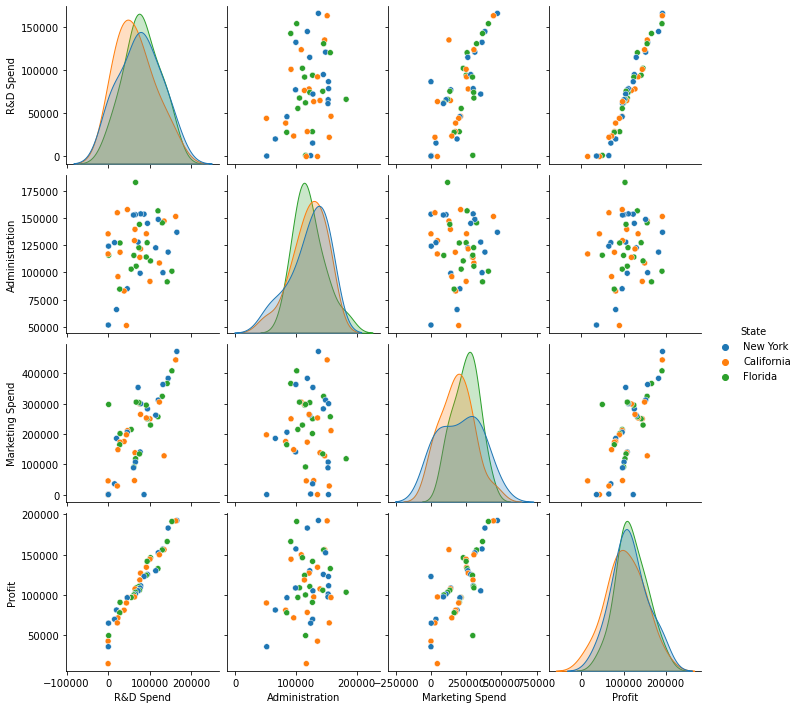

In [10]:
sns.pairplot(df,hue='State')

In [4]:
dfc = pd.get_dummies(df)
dfc.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0


### Correlation matix

<AxesSubplot:>

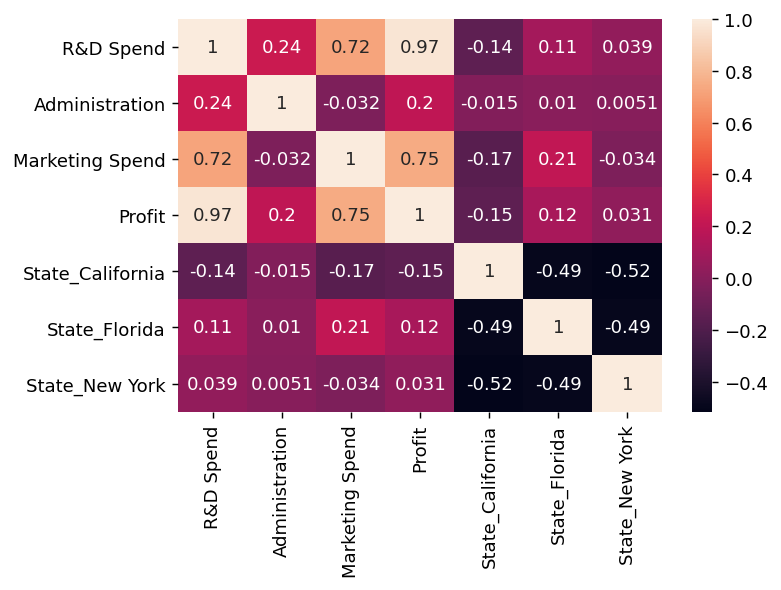

In [6]:
from matplotlib.pyplot import figure
figure(figsize=(6,4),dpi=130)
sns.heatmap(dfc.corr(),annot=True)

In [7]:
dfc = dfc.rename(columns={"R&D Spend":"RD_Spend","Marketing Spend":"Marketing_spend","State_New York":"State_NY"})

### Building intial regression model

In [8]:
model_1 = smf.ols("Profit~RD_Spend+Marketing_spend+Administration+State_California+State_Florida+State_NY",data=dfc).fit()

In [9]:
model_1.rsquared

0.9507524843355148

In [10]:
model_1.summary()

# very high p-value for administration suggesting insignificance.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           1.34e-27
Time:                        14:35:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD_Spend             0.8060      0.046     17.369      0.000       0.712       0.900
Marketing_spend      0.0270      0.017      1.574      0.123      -0.008       0.062
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
State_California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
State_Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
State_NY          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.57e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Testing for multi-collinearity

In [11]:
admn = smf.ols("Profit~Administration",data=dfc).fit()
print(admn.t_test,'\n',admn.tvalues)

<bound method LikelihoodModelResults.t_test of <statsmodels.regression.linear_model.OLSResults object at 0x000002037DDBCDF0>> 
 Intercept         3.040044
Administration    1.419493
dtype: float64


In [12]:
admn.summary()

# Very high value of standard error of intercept and very low r2 value.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.162
Time:                        14:35:13   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
mks = smf.ols("Profit~Marketing_spend",data=dfc).fit()
mks.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           4.38e-10
Time:                        14:35:13   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
m33 = smf.ols("Profit~Marketing_spend+Administration",data=dfc).fit()
m33.summary()

# Very high value of standard error of intercept and low r2 value, 
# This was also the case when model consited of just administration feature.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.50e-10
Time:                        14:35:13   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Marketing_spend     0.2488      0.030      8.281      0.000       0.188       0.309
Administration      0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Calculating VIF

In [15]:
rsq_admn = smf.ols("Administration~RD_Spend+Marketing_spend",data=dfc).fit().rsquared
vif_admn = 1/(1-rsq_admn)

rsq_rd = smf.ols("RD_Spend~Administration+Marketing_spend",data=dfc).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_mkc = smf.ols("Marketing_spend~Administration+RD_Spend",data=dfc).fit().rsquared
vif_mkc = 1/(1-rsq_mkc)

dvf = {"Variables":["Administration","RD_Spend","Marketing_spend"],
       "VIF":[vif_admn,vif_rd,vif_mkc]}

Vif_frame = pd.DataFrame(dvf)  
Vif_frame

# We don't see any absurd values of VIF.

,Variables,VIF
0,Administration,1.175091
1,RD_Spend,2.468903
2,Marketing_spend,2.326773


## Residual Analysis
### Test for Normality of Residuals (Q-Q plot)

<function matplotlib.pyplot.show(close=None, block=None)>

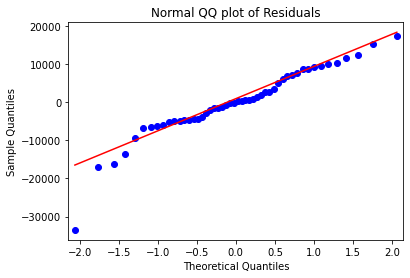

In [16]:
import statsmodels.api as sm
qqplt = sm.qqplot(model_1.resid,line="q")
plt.title("Normal QQ plot of Residuals")
plt.show

# Residuals are almost normally distributed.

### Residual Plot for Homoscadasicity

In [17]:
def rtn_standardised_vals (x):
    return (x-x.mean())/x.std()

Text(0, 0.5, 'residue values')

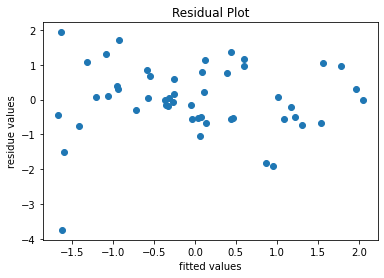

In [18]:
plt.scatter(rtn_standardised_vals(model_1.fittedvalues),rtn_standardised_vals(model_1.resid))
plt.title("Residual Plot")
plt.xlabel("fitted values")
plt.ylabel("residue values")

# Looking at the plot we can say that there is no apperent pattern or residual plot has homoscadasicity.

### Residuals vs Regressors

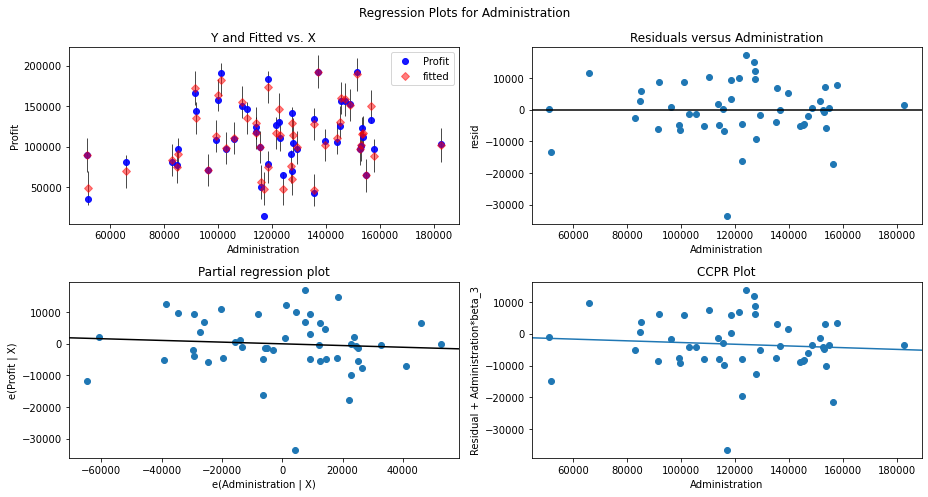

In [19]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model_1,"Administration",fig=fig)

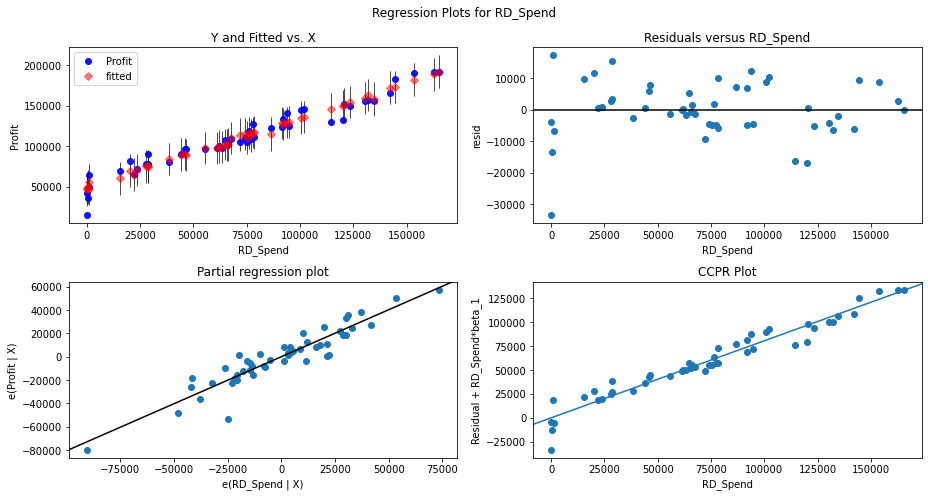

In [20]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model_1,"RD_Spend",fig=fig)

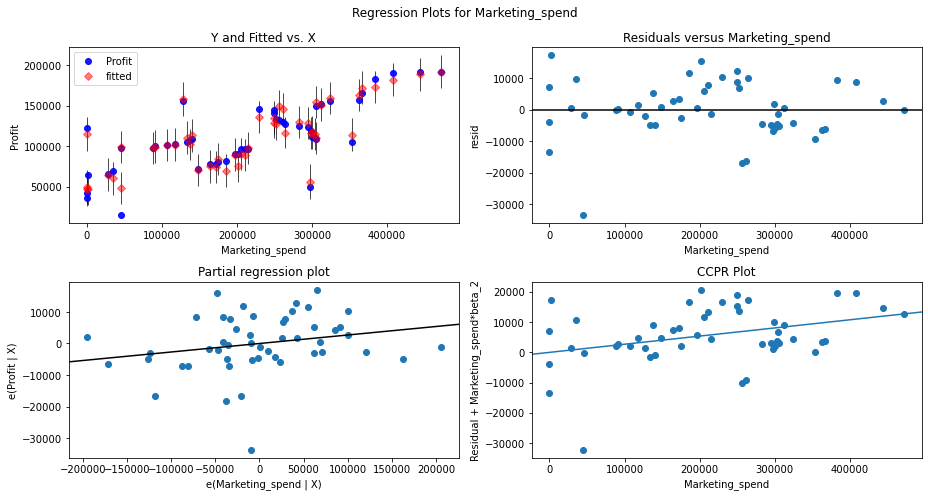

In [21]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model_1,"Marketing_spend",fig=fig)

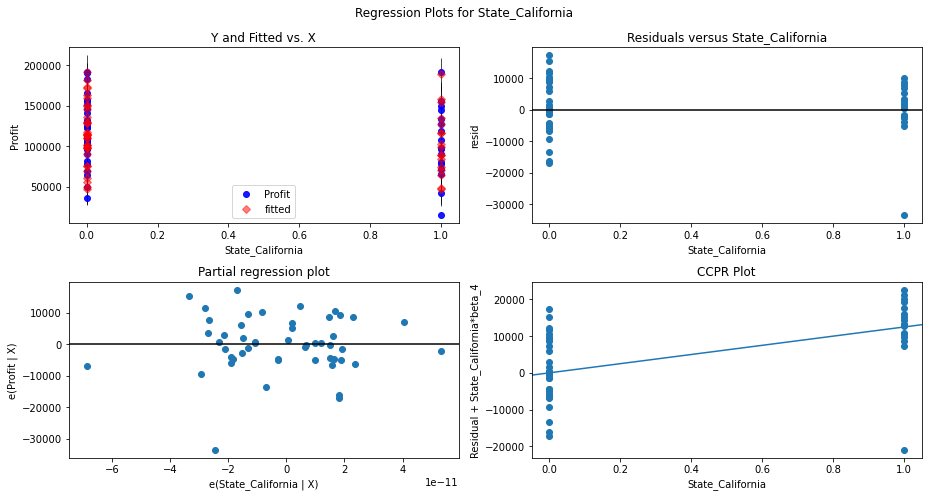

In [22]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model_1,"State_California",fig=fig)

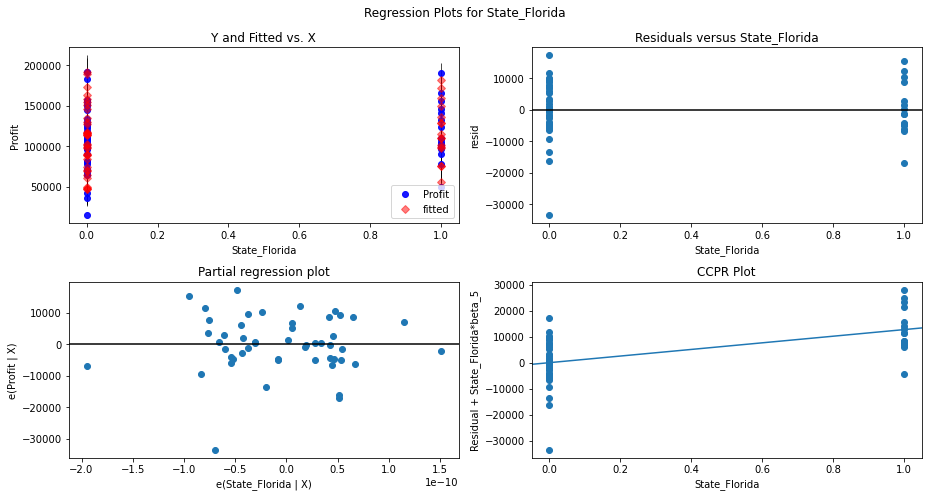

In [23]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model_1,"State_Florida",fig=fig)

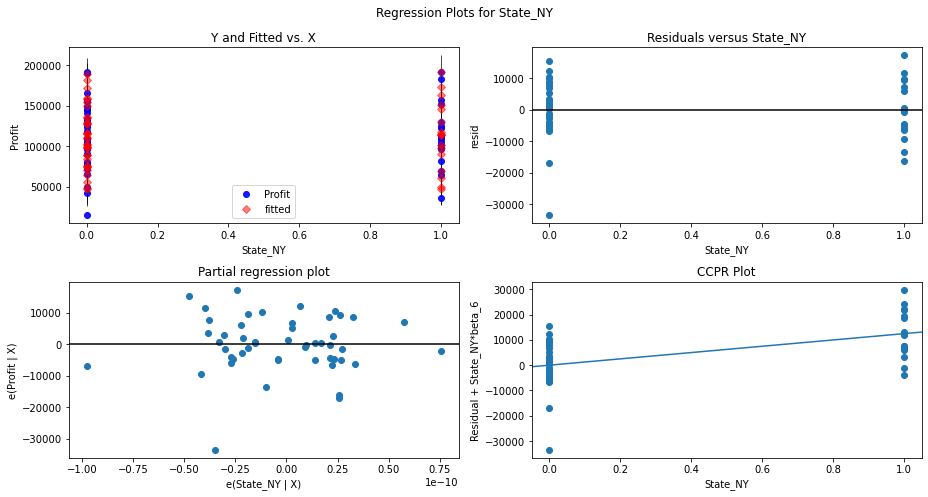

In [24]:
fig = plt.figure(figsize=(13,7))
fig = sm.graphics.plot_regress_exog(model_1,"State_NY",fig=fig)

## Model Deletion Diagnostics
### Detecting Outliers

## Cook's distance

In [25]:
model_influence = model_1.get_influence()
(c, d) = model_influence.cooks_distance

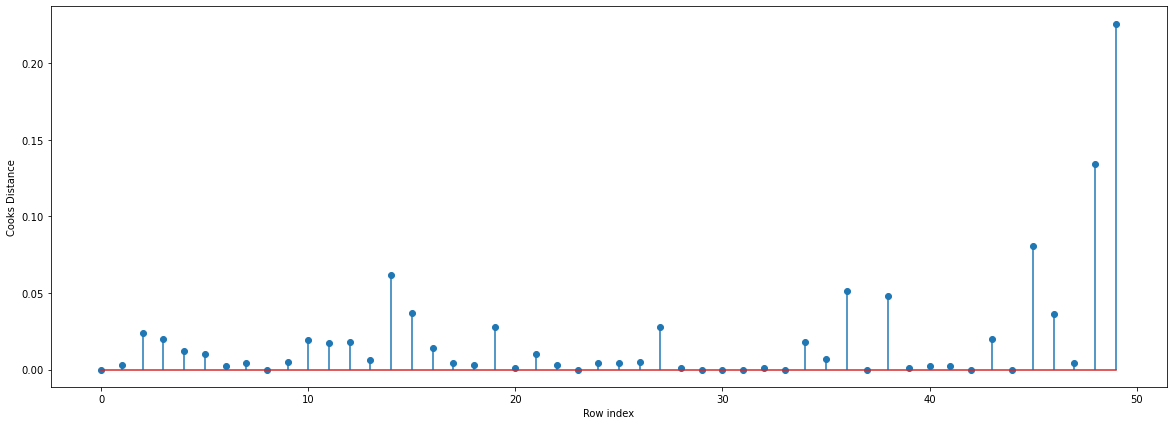

In [26]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dfc)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
#index and value of influencer where c is largest.
(np.argmax(c),np.max(c))

(49, 0.22625094501509327)

### High Influence points

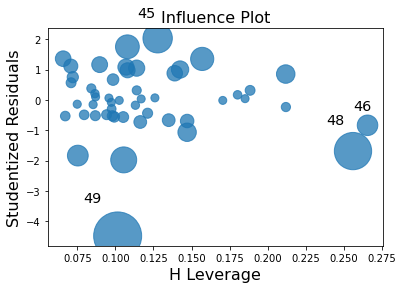

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_1)
plt.show()

### From above plot it evident that point 49 & 48 are big influencers.

In [29]:
dfc[dfc.index.isin([45,49,48])]

,RD_Spend,Administration,Marketing_spend,Profit,State_California,State_Florida,State_NY
45,1000.23,124153.04,1903.93,64926.08,0,0,1
48,542.05,51743.15,0.00,35673.41,0,0,1
49,0.00,116983.80,45173.06,14681.40,1,0,0


In [30]:
dfc.head(3)

,RD_Spend,Administration,Marketing_spend,Profit,State_California,State_Florida,State_NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0


## Improving the model

In [31]:
# Droping extreme outliers

dfc_2 = dfc.drop(dfc.index[[45,48,49]],axis=0).reset_index()
dfc_2 = dfc_2.drop(["index"],axis=1)

### Building a new model

In [32]:
model_2 = smf.ols("Profit~RD_Spend+Marketing_spend+State_California+State_Florida+State_NY",data=dfc_2).fit()
model_2.rsquared

# We have improved from 95.1% to 96.3%

0.9628306606239356

### Cook's distance

In [33]:
model_2_influence = model_2.get_influence()
(c2,d2) = model_2_influence.cooks_distance

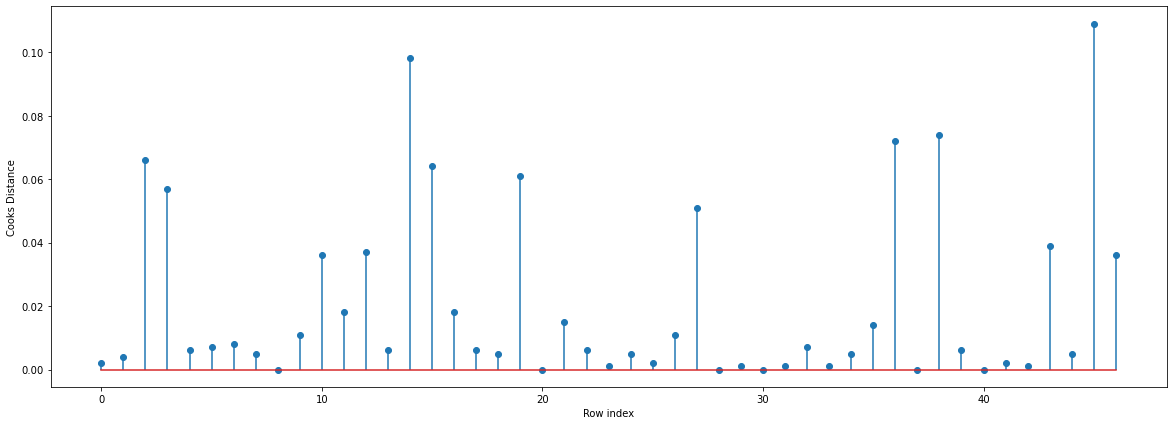

In [34]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dfc_2)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()
# There don't seem to be any extreme outliers present.

In [35]:
predicted_profit=model_2.predict(dfc[["RD_Spend","Marketing_spend","Administration","State_California","State_Florida","State_NY"]])

In [36]:
predicted_profit.head(5)

0    190469.713943
1    189619.601428
2    179835.514085
3    171653.942876
4    169842.364216
dtype: float64

In [37]:
data1 = [["model_1",0.951],["model_2",0.963]]
r2_table = pd.DataFrame(data=data1,columns=["model","r2"])

In [38]:
r2_table

,model,r2
0,model_1,0.951
1,model_2,0.963


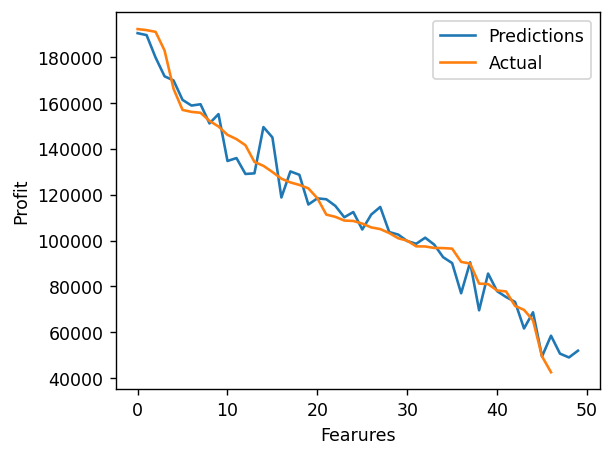

In [42]:
figure(figsize=(5,4),dpi=125)
plt.plot(predicted_profit,label='Predictions')
plt.plot(dfc_2["Profit"],label='Actual')
plt.xlabel("Fearures")
plt.ylabel("Profit")
plt.legend()